In [1]:
import numpy as np
import pandas as pd

In [4]:
import pandas as pd

url = "https://drive.google.com/uc?id=1JmMojw3_S82fmFKhkqmd4pnaO_oTYsmr"
df = pd.read_csv(url)
print(df.head())


                                       clean_comment  category
0   family mormon have never tried explain them t...       1.0
1  buddhism has very much lot compatible with chr...       1.0
2  seriously don say thing first all they won get...      -1.0
3  what you have learned yours and only yours wha...       0.0
4  for your own benefit you may want read living ...       1.0


In [5]:
df.shape

(200229, 2)

In [6]:
df.sample()['clean_comment'].values

array(['learn ignore that what '], dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200229 entries, 0 to 200228
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   clean_comment  200125 non-null  object 
 1   category       200222 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.1+ MB


In [8]:
df.isnull().sum()

,0
clean_comment,104
category,7


In [9]:
df[df['clean_comment'].isna()]

,clean_comment,category
413,NaN,0.0
605,NaN,0.0
2422,NaN,0.0
2877,NaN,0.0
3307,NaN,0.0
...,...,...
37238,NaN,0.0
37397,NaN,0.0
195943,NaN,-1.0
196692,NaN,0.0


In [10]:
df[df['clean_comment'].isna()]['category'].value_counts()

,count
category,
0.0,102
-1.0,1
1.0,1


In [11]:
df.dropna(inplace=True)

In [12]:
df.duplicated().sum()

np.int64(410)

In [13]:
df[df.duplicated()]

,clean_comment,category
375,,0.0
392,,0.0
617,aurum mom,0.0
651,,0.0
1222,,0.0
...,...,...
171338,what this,0.0
172959,tell something new,1.0
177777,true that,1.0
184768,spot,0.0


In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df[(df['clean_comment'].str.strip() == '')]

,clean_comment,category
181,,0.0
4432,\n,0.0
10592,,0.0
16173,,0.0
32149,\n,0.0
34959,,0.0


In [17]:
df = df[~(df['clean_comment'].str.strip() == '')]

In [18]:
# Convert the 'clean_comment' column to lowercase
df['clean_comment'] = df['clean_comment'].str.lower()

# Verify the transformation by displaying the first few rows
df.head()


,clean_comment,category
0,family mormon have never tried explain them t...,1.0
1,buddhism has very much lot compatible with chr...,1.0
2,seriously don say thing first all they won get...,-1.0
3,what you have learned yours and only yours wha...,0.0
4,for your own benefit you may want read living ...,1.0


In [19]:
df[df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' '))]

,clean_comment,category
0,family mormon have never tried explain them t...,1.0
1,buddhism has very much lot compatible with chr...,1.0
2,seriously don say thing first all they won get...,-1.0
3,what you have learned yours and only yours wha...,0.0
4,for your own benefit you may want read living ...,1.0
...,...,...
200221,engine growth modi unveils indias first 12000 ...,1.0
200222,modi promised 2014 lok sabha elections that be...,1.0
200224,why these 456 crores paid neerav modi not reco...,-1.0
200226,did you cover her interaction forum where she ...,0.0


In [20]:
# Remove trailing and leading whitespaces from the 'clean_comment' column
df['clean_comment'] = df['clean_comment'].str.strip()

# Verify the transformation by checking for any remaining trailing whitespaces
df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' ')).sum()

np.int64(0)

In [21]:
# Identify comments containing URLs
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
comments_with_urls = df[df['clean_comment'].str.contains(url_pattern, regex=True)]

# Display the comments containing URLs
comments_with_urls.head()


,clean_comment,category


In [22]:
# Identify comments containing new line characters
comments_with_newline = df[df['clean_comment'].str.contains('\n')]

# Display the comments containing new line characters
comments_with_newline.head()


,clean_comment,category
448,what missing jpg\nand why this brilliant edit ...,1.0
781,india has been ruined congress and populist sc...,-1.0
847,like aap for its stand corruption and making p...,-1.0
871,reduced trade\ndeficit stronger rupee aren the...,0.0
1354,amsa press conference australian maritime safe...,1.0


In [23]:
# Remove new line characters from the 'clean_comment' column
df['clean_comment'] = df['clean_comment'].str.replace('\n', ' ', regex=True)

# Verify the transformation by checking for any remaining new lines
comments_with_newline_remaining = df[df['clean_comment'].str.contains('\n')]
comments_with_newline_remaining


,clean_comment,category


## EDA

<Axes: xlabel='category', ylabel='count'>

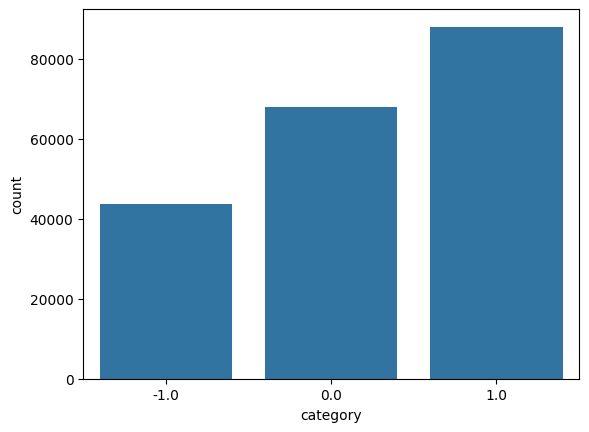

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
# distribution of classes

sns.countplot(data=df,x="category")

In [25]:
# frequency distribution of sentiments

df['category'].value_counts(normalize=True).mul(100).round(2)

,proportion
category,
1.0,44.06
0.0,34.03
-1.0,21.91


In [26]:
df['word_count'] = df['clean_comment'].apply(lambda x: len(x.split()))

In [27]:
df.sample(5)

,clean_comment,category,word_count
176373,when people india fought against british gover...,1.0,27
24324,non ppr gordon sammy watkins,0.0,5
44356,what the reason why these promises are unfulfi...,1.0,23
145798,congress wil come zero modi wil again hero see...,0.0,11
32947,uske squad page they are making plans mass rep...,0.0,18


In [28]:
df['word_count'].describe()

,word_count
count,199702.000000
mean,21.852560
std,26.541971
min,1.000000
25%,10.000000
50%,18.000000
75%,29.000000
max,1307.000000


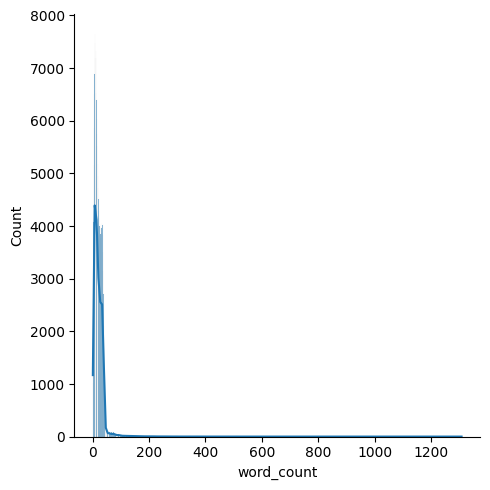

In [29]:
sns.displot(df['word_count'], kde=True)

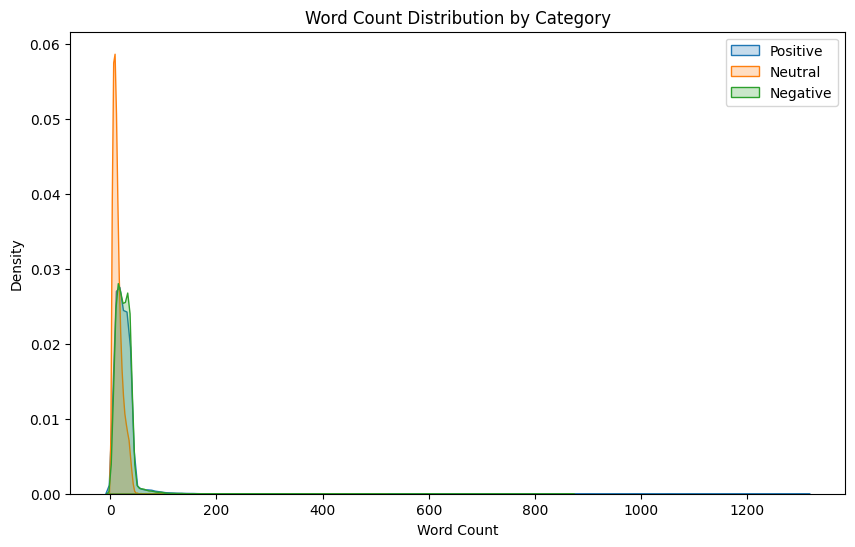

In [31]:
# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot KDE for category 1
sns.kdeplot(df[df['category'] == 1]['word_count'], label='Positive', fill=True)

# Plot KDE for category 0
sns.kdeplot(df[df['category'] == 0]['word_count'], label='Neutral', fill=True)

# Plot KDE for category -1
sns.kdeplot(df[df['category'] == -1]['word_count'], label='Negative', fill=True)

# Add title and labels
plt.title('Word Count Distribution by Category')
plt.xlabel('Word Count')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

**Positive comments (category 1)**: These tend to have a wider spread in word count, indicating that longer comments are more common in positive sentiments.<br>
**Neutral comments (category 0)**: The distribution shows a relatively lower frequency and is more concentrated around shorter comments compared to positive or negative ones.<br>
**Negative comments (category -1)**: These comments have a distribution somewhat similar to positive comments but with a smaller proportion of longer comments.

<Axes: ylabel='word_count'>

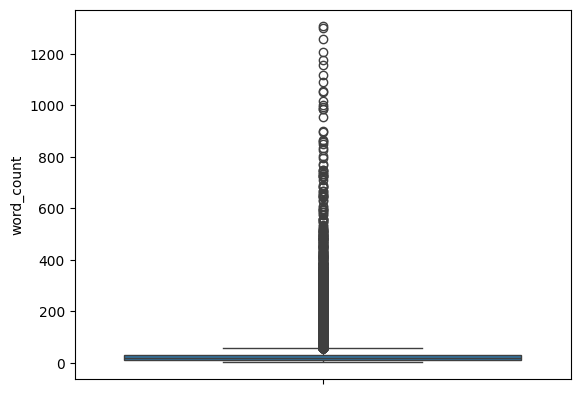

In [32]:
sns.boxplot(df['word_count'])

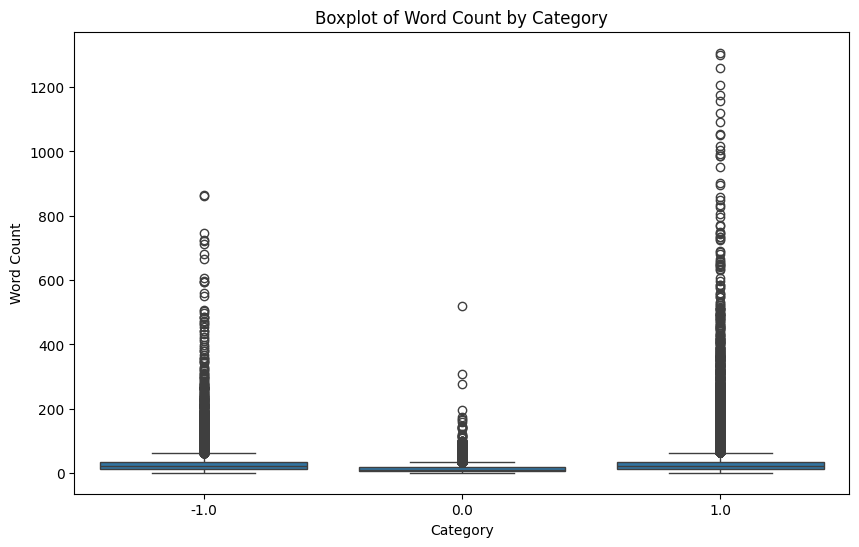

In [33]:
# Create a boxplot for the 'wordcount' column categorized by 'category'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='category', y='word_count')
plt.title('Boxplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

**Positive comments (category 1)**: The median word count is relatively high, and there are several outliers with longer comments, indicating that positive comments tend to be more verbose.<br>
**Neutral comments (category 0)**: The median word count is the lowest, with a tighter interquartile range (IQR), suggesting that neutral comments are generally shorter.<br>
**Negative comments (category -1)**: The word count distribution is similar to positive comments but with a slightly lower median and fewer extreme outliers.

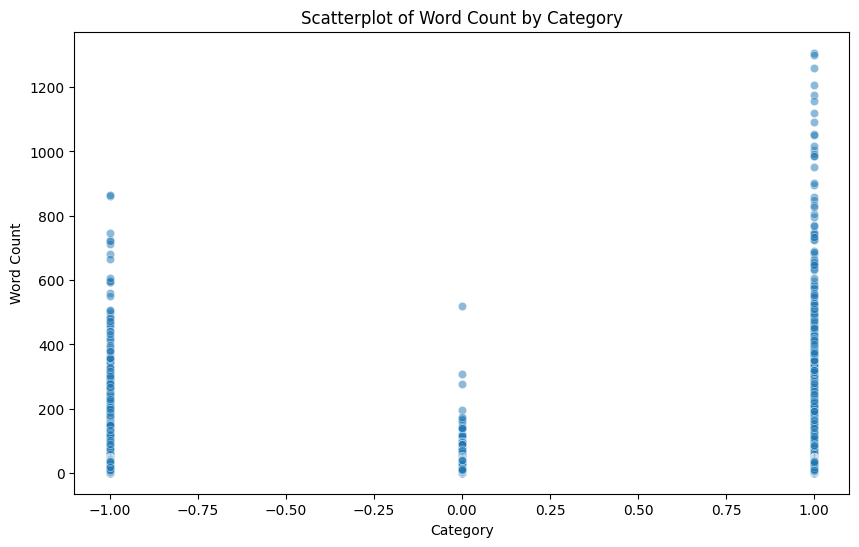

In [34]:
# Create a scatterplot between 'category' and 'wordcount'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='category', y='word_count', alpha=0.5)
plt.title('Scatterplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

<Axes: xlabel='category', ylabel='word_count'>

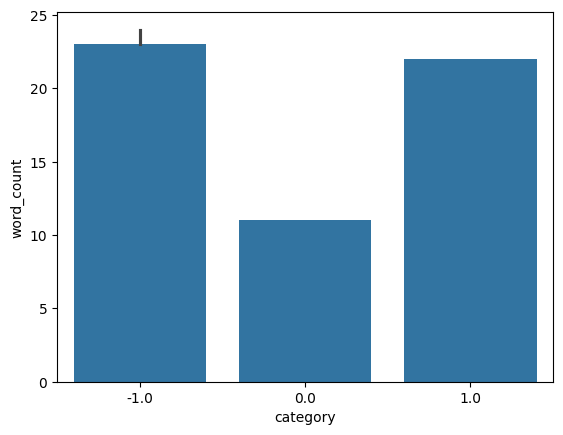

In [35]:
# median word counts among sentiments

sns.barplot(df,x='category',y='word_count',estimator='median')

In [36]:
!pip install nltk

In [37]:
from nltk.corpus import stopwords

# Download NLTK stopwords if not already downloaded
import nltk
nltk.download('stopwords')

# Define the list of English stopwords
stop_words = set(stopwords.words('english'))

# Create a new column 'num_stop_words' by counting the number of stopwords in each comment
df['num_stop_words'] = df['clean_comment'].apply(lambda x: len([word for word in x.split() if word in stop_words]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [38]:
df.sample(5)

,clean_comment,category,word_count,num_stop_words
101307,this hatefilled uneducated bharat facts are no...,0.0,9,4
42243,bhakk modi never made such promises improve co...,-1.0,17,2
25998,think dfad good for not sure about his ministe...,1.0,10,4
196418,pakistan fix after balakot strikes read,0.0,6,1
25542,just dont understand how liberal reddit loves ...,1.0,30,8


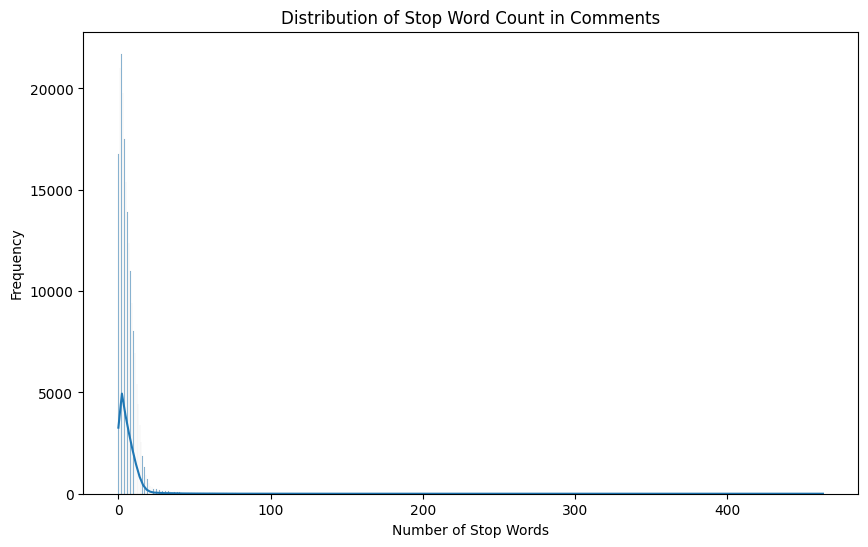

In [39]:
# Create a distribution plot (displot) for the 'num_stop_words' column
plt.figure(figsize=(10, 6))
sns.histplot(df['num_stop_words'], kde=True)
plt.title('Distribution of Stop Word Count in Comments')
plt.xlabel('Number of Stop Words')
plt.ylabel('Frequency')
plt.show()


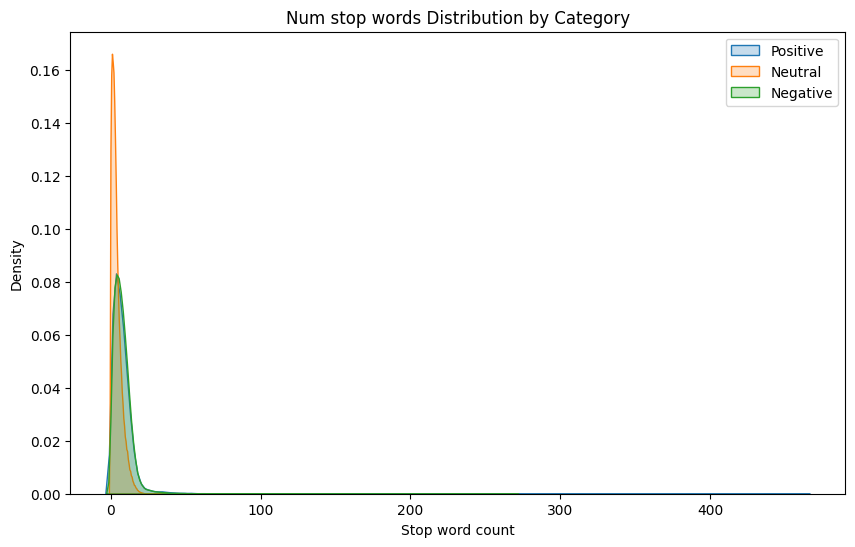

In [40]:
# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot KDE for category 1
sns.kdeplot(df[df['category'] == 1]['num_stop_words'], label='Positive', fill=True)

# Plot KDE for category 0
sns.kdeplot(df[df['category'] == 0]['num_stop_words'], label='Neutral', fill=True)

# Plot KDE for category -1
sns.kdeplot(df[df['category'] == -1]['num_stop_words'], label='Negative', fill=True)

# Add title and labels
plt.title('Num stop words Distribution by Category')
plt.xlabel('Stop word count')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

<Axes: xlabel='category', ylabel='num_stop_words'>

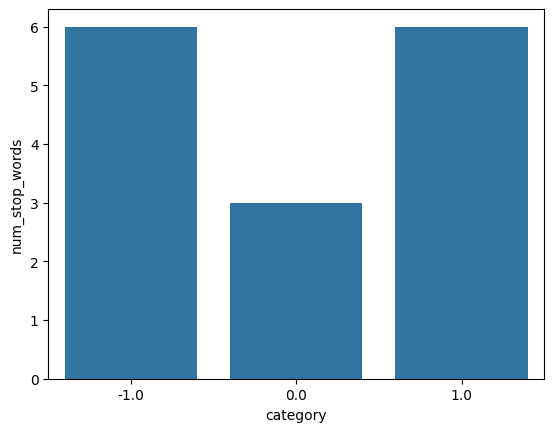

In [41]:
# median word counts among sentiments

sns.barplot(df,x='category',y='num_stop_words',estimator='median')

<ipython-input-42-24de6c77347d>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')


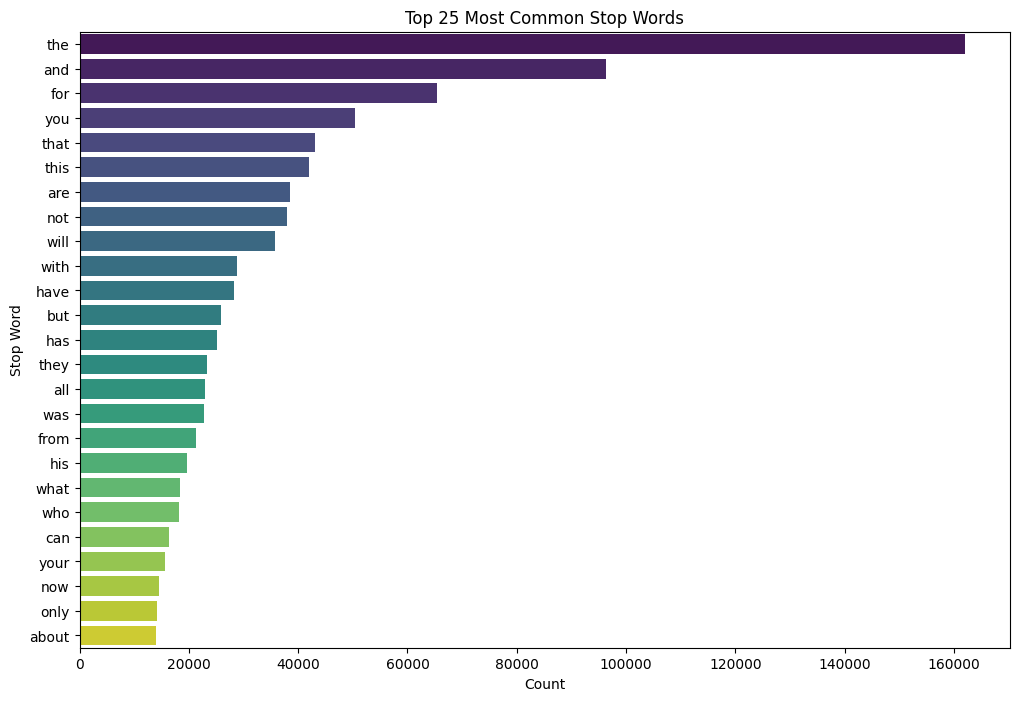

In [42]:
# Create a frequency distribution of stop words in the 'clean_comment' column
from collections import Counter

# Extract all stop words from the comments using the previously defined 'common_stopwords'
all_stop_words = [word for comment in df['clean_comment'] for word in comment.split() if word in stop_words]

# Count the most common stop words
most_common_stop_words = Counter(all_stop_words).most_common(25)

# Convert the most common stop words to a DataFrame for plotting
top_25_df = pd.DataFrame(most_common_stop_words, columns=['stop_word', 'count'])

# Create the barplot for the top 25 most common stop words
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')
plt.title('Top 25 Most Common Stop Words')
plt.xlabel('Count')
plt.ylabel('Stop Word')
plt.show()



In [43]:
df['num_chars'] = df['clean_comment'].apply(len)

df.head()

,clean_comment,category,word_count,num_stop_words,num_chars
0,family mormon have never tried explain them th...,1.0,39,13,259
1,buddhism has very much lot compatible with chr...,1.0,196,59,1268
2,seriously don say thing first all they won get...,-1.0,86,40,459
3,what you have learned yours and only yours wha...,0.0,29,15,167
4,for your own benefit you may want read living ...,1.0,112,45,690


In [44]:
df['num_chars'].describe()

,num_chars
count,199702.000000
mean,134.395975
std,167.675736
min,1.000000
25%,60.000000
50%,108.000000
75%,183.000000
max,8664.000000


In [45]:
from collections import Counter

# Combine all comments into one large string
all_text = ' '.join(df['clean_comment'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)



In [46]:
char_frequency_df['character'].values

array([' ', 'e', 'a', ..., 'స', '☮', 'ୀ'], dtype=object)

In [47]:
char_frequency_df.tail(50)

,character,frequency
185,ば,1
1493,ప,1
643,拍,1
1597,ť,1
1595,క,1
1594,ఎ,1
1543,▓,1
1539,◙,1
1536,ૂ,1
1535,ભ,1


In [48]:
# Create a new column 'num_punctuation_chars' to count punctuation characters in each comment
df['num_punctuation_chars'] = df['clean_comment'].apply(
    lambda x: sum([1 for char in x if char in '.,!?;:"\'()[]{}-'])
)

df.sample(5)

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
105731,all you could see the announcement was how mod...,-1.0,42,21,223,0
63191,phir bjp phir modi again,0.0,5,1,24,0
193233,modi interact with chowkidars part main bhi ch...,1.0,14,3,87,0
145037,you provide details about not voting for bjp b...,-1.0,26,15,143,0
39916,all remember raid elderly ppl kidswe also reme...,-1.0,37,7,237,0


In [49]:
df['num_punctuation_chars'].describe()

,num_punctuation_chars
count,199702.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


<ipython-input-50-0a1e861f808a>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')


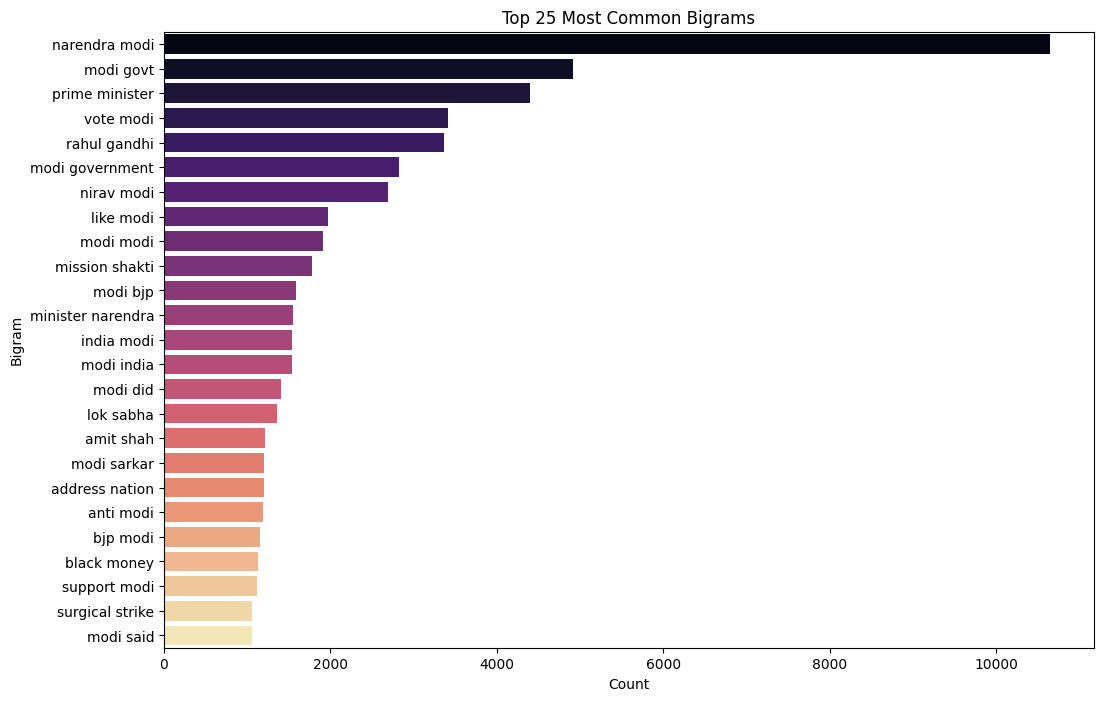

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a function to extract the top 25 bigrams
def get_top_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 bigrams
top_25_bigrams = get_top_ngrams(df['clean_comment'], 25)

# Convert the bigrams into a DataFrame for plotting
top_25_bigrams_df = pd.DataFrame(top_25_bigrams, columns=['bigram', 'count'])

# Plot the countplot for the top 25 bigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')
plt.title('Top 25 Most Common Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()


<ipython-input-51-098c7efd1a63>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='coolwarm')


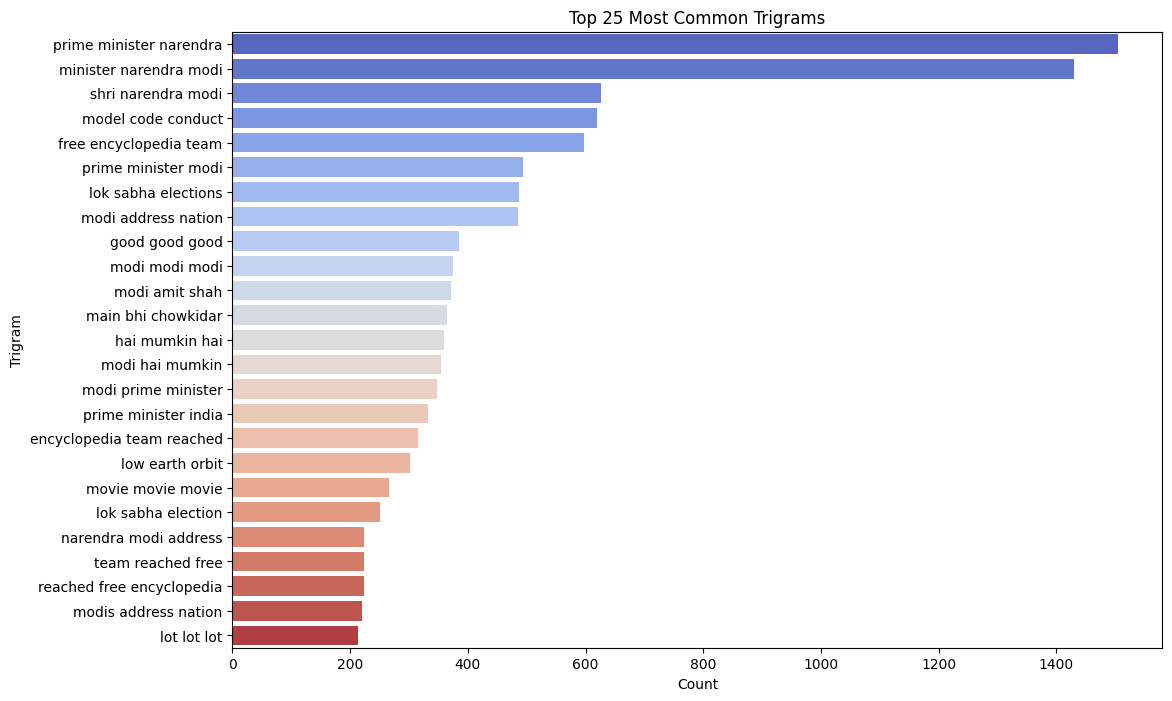

In [51]:
# Create a function to extract the top 25 trigrams
def get_top_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 trigrams
top_25_trigrams = get_top_trigrams(df['clean_comment'], 25)

# Convert the trigrams into a DataFrame for plotting
top_25_trigrams_df = pd.DataFrame(top_25_trigrams, columns=['trigram', 'count'])

# Plot the countplot for the top 25 trigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='coolwarm')
plt.title('Top 25 Most Common Trigrams')
plt.xlabel('Count')
plt.ylabel('Trigram')
plt.show()

In [52]:
# Remove non-English characters from the 'clean_comment' column
# Keeping only standard English letters, digits, and common punctuation
import re

df['clean_comment'] = df['clean_comment'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s!?.,]', '', str(x)))


In [53]:
all_text = ' '.join(df['clean_comment'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)

char_frequency_df

,character,frequency
6,,4367200
12,e,2465062
1,a,1967436
13,t,1802308
3,i,1782109
7,o,1660883
9,n,1568419
17,s,1432776
8,r,1358548
10,h,1080203


In [54]:
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon have never tried explain them th...,1.0,39,13,259,0
1,buddhism has very much lot compatible with chr...,1.0,196,59,1268,0
2,seriously don say thing first all they won get...,-1.0,86,40,459,0
3,what you have learned yours and only yours wha...,0.0,29,15,167,0
4,for your own benefit you may want read living ...,1.0,112,45,690,0


In [55]:
from nltk.corpus import stopwords

# Defining stop words but keeping essential ones for sentiment analysis
stop_words = set(stopwords.words('english')) - {'not', 'but', 'however', 'no', 'yet'}

# Remove stop words from 'clean_comment' column, retaining essential ones
df['clean_comment'] = df['clean_comment'].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])
)




In [56]:
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon never tried explain still stare ...,1.0,39,13,259,0
1,buddhism much lot compatible christianity espe...,1.0,196,59,1268,0
2,seriously say thing first get complex explain ...,-1.0,86,40,459,0
3,learned want teach different focus goal not wr...,0.0,29,15,167,0
4,benefit may want read living buddha living chr...,1.0,112,45,690,0


In [57]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

# Define the lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to the 'clean_comment_no_stopwords' column
df['clean_comment'] = df['clean_comment'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
)

df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon never tried explain still stare ...,1.0,39,13,259,0
1,buddhism much lot compatible christianity espe...,1.0,196,59,1268,0
2,seriously say thing first get complex explain ...,-1.0,86,40,459,0
3,learned want teach different focus goal not wr...,0.0,29,15,167,0
4,benefit may want read living buddha living chr...,1.0,112,45,690,0


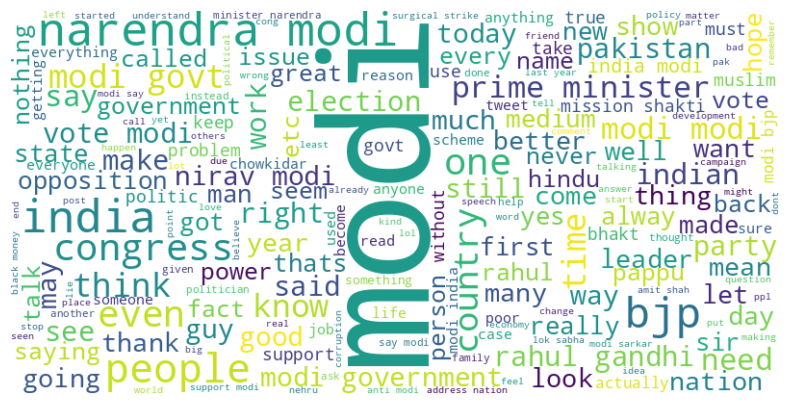

In [58]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df['clean_comment'])

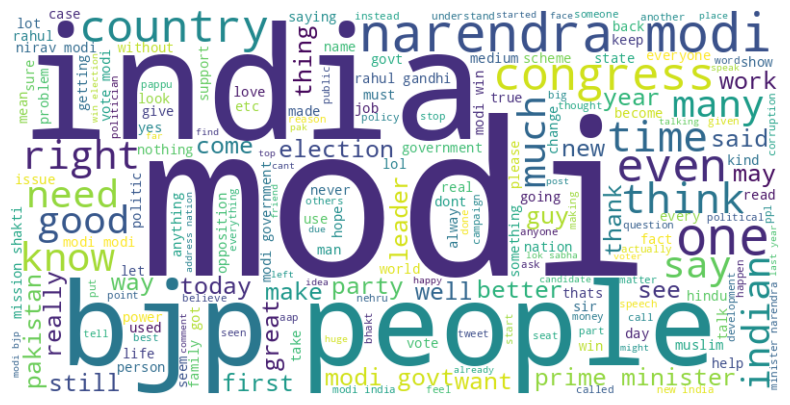

In [59]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['category'] == 1]['clean_comment'])

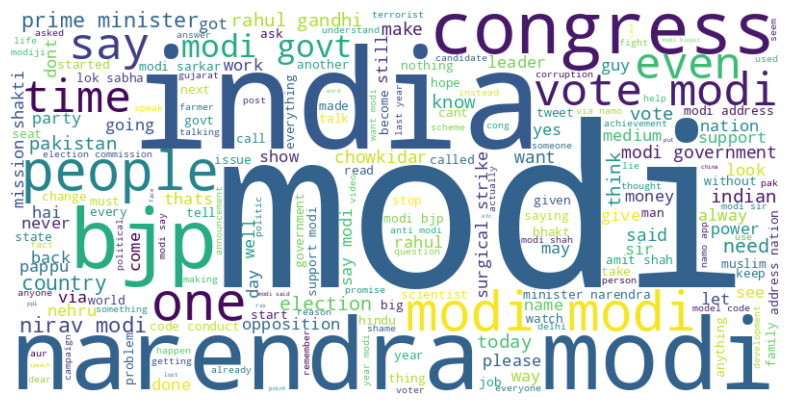

In [60]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['category'] == 0]['clean_comment'])

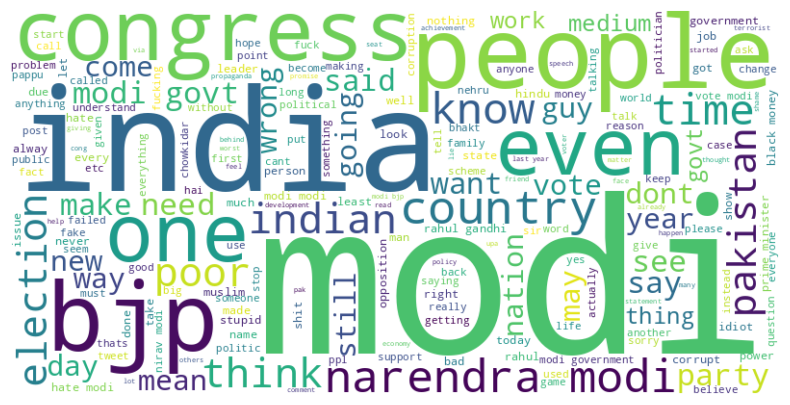

In [61]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['category'] == -1]['clean_comment'])

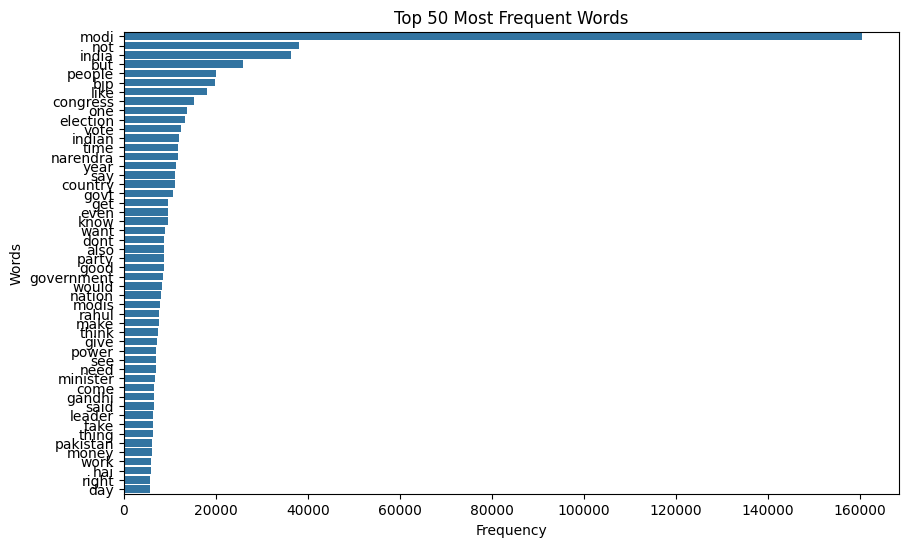

In [62]:
def plot_top_n_words(df, n=20):
    """Plot the top N most frequent words in the dataset."""
    # Flatten all words in the content column
    words = ' '.join(df['clean_comment']).split()

    # Get the top N most common words
    counter = Counter(words)
    most_common_words = counter.most_common(n)

    # Split the words and their counts for plotting
    words, counts = zip(*most_common_words)

    # Plot the top N words
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(f'Top {n} Most Frequent Words')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

# Example usage
plot_top_n_words(df, n=50)


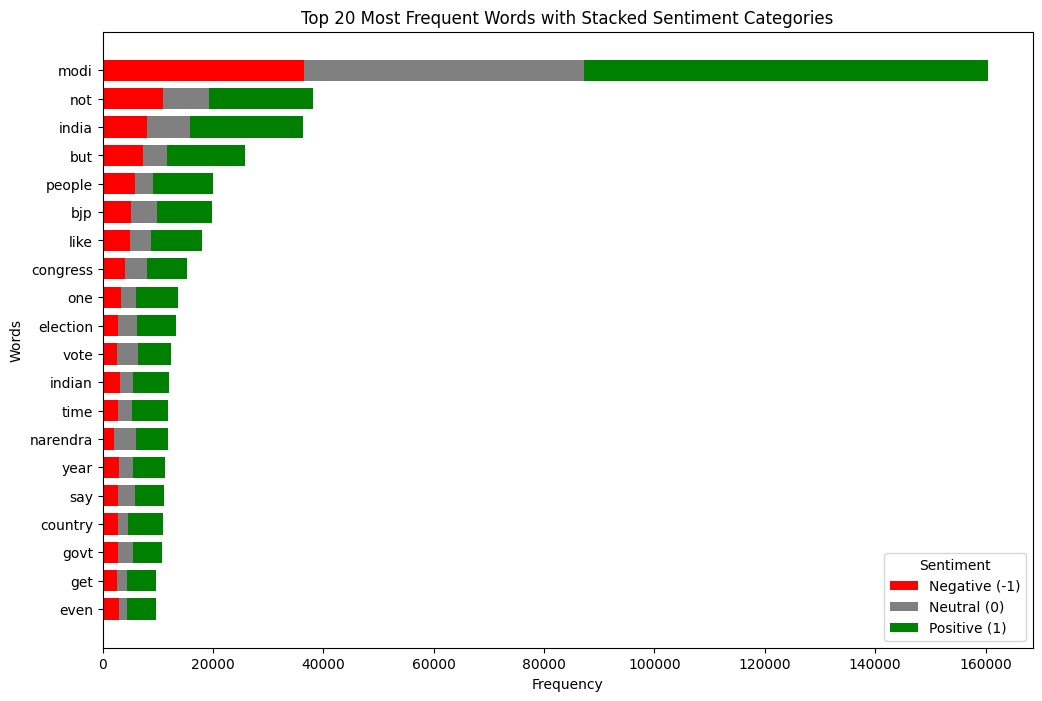

In [63]:
def plot_top_n_words_by_category(df, n=20, start=0):
    """Plot the top N most frequent words in the dataset with stacked hue based on sentiment category."""
    # Flatten all words in the content column and count their occurrences by category
    word_category_counts = {}

    for idx, row in df.iterrows():
        words = row['clean_comment'].split()
        category = row['category']  # Assuming 'category' column exists for -1, 0, 1 labels

        for word in words:
            if word not in word_category_counts:
                word_category_counts[word] = { -1: 0, 0: 0, 1: 0 }  # Initialize counts for each sentiment category

            # Increment the count for the corresponding sentiment category
            word_category_counts[word][category] += 1

    # Get total counts across all categories for each word
    total_word_counts = {word: sum(counts.values()) for word, counts in word_category_counts.items()}

    # Get the top N most frequent words across all categories
    most_common_words = sorted(total_word_counts.items(), key=lambda x: x[1], reverse=True)[start:start+n]
    top_words = [word for word, _ in most_common_words]

    # Prepare data for plotting
    word_labels = top_words
    negative_counts = [word_category_counts[word][-1] for word in top_words]
    neutral_counts = [word_category_counts[word][0] for word in top_words]
    positive_counts = [word_category_counts[word][1] for word in top_words]

    # Plot the stacked bar chart
    plt.figure(figsize=(12, 8))
    bar_width = 0.75

    # Plot negative, neutral, and positive counts in a stacked manner
    plt.barh(word_labels, negative_counts, color='red', label='Negative (-1)', height=bar_width)
    plt.barh(word_labels, neutral_counts, left=negative_counts, color='gray', label='Neutral (0)', height=bar_width)
    plt.barh(word_labels, positive_counts, left=[i+j for i,j in zip(negative_counts, neutral_counts)], color='green', label='Positive (1)', height=bar_width)

    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top {n} Most Frequent Words with Stacked Sentiment Categories')
    plt.legend(title='Sentiment', loc='lower right')
    plt.gca().invert_yaxis()  # Invert y-axis to show the highest frequency at the top
    plt.show()



plot_top_n_words_by_category(df, n=20)
